# McStas  

## First time setup McStas Script

In [1]:
from mcstasscript.interface import functions

In [2]:
# Each time a new conda env is created and used McStas must be configured 
# Ubuntu

my_configurator = functions.Configurator()
my_configurator.set_mcrun_path("/usr/share/mcstas/2.6.1/bin/")
my_configurator.set_mcstas_path("/usr/share/mcstas/2.6.1")

In [ ]:
# Each time a new conda env is created and used McStas must be configured 
# Centos

my_configurator = functions.Configurator()
my_configurator.set_mcrun_path("/usr/local/bin/")
my_configurator.set_mcstas_path("/usr/local/mcstas/2.5/")

## McStas instr file

In [3]:
from mcstasscript.interface import instr, plotter, functions

In [4]:
ISIS_SANS2d_Mantid = instr.McStas_instr("ISIS_SANS2d_Mantid_generated")
ISIS_SANS2d_Mantid.add_parameter("double", "L1", value=3.926)
ISIS_SANS2d_Mantid.add_parameter("double", "A1w", value=0.03)
ISIS_SANS2d_Mantid.add_parameter("double", "A1h", value=0.02)
ISIS_SANS2d_Mantid.add_parameter("double", "S6", value=0.006)
ISIS_SANS2d_Mantid.add_parameter("double", "A2", value=0.006)
ISIS_SANS2d_Mantid.add_parameter("double", "Lmin", value=1.0)
ISIS_SANS2d_Mantid.add_parameter("double", "Lmax", value=14.0)
ISIS_SANS2d_Mantid.add_parameter("double", "model_nr", value=5.0)

In [5]:
a1 = ISIS_SANS2d_Mantid.add_component("a1", "Progress_bar")
a1.set_AT(['0', '0', '0'], RELATIVE="ABSOLUTE")

In [6]:
Origin = ISIS_SANS2d_Mantid.add_component("Origin", "Arm")
Origin.set_AT(['0', '0', '0'], RELATIVE="ABSOLUTE")

In [7]:
isis_source = ISIS_SANS2d_Mantid.add_component("isis_source", "ISIS_moderator")
isis_source.Face = "\"E2\""
isis_source.Emin = "-Lmax"
isis_source.Emax = "-Lmin"
isis_source.dist = 3.68
isis_source.focus_xw = 0.0365
isis_source.focus_yh = 0.021
isis_source.xwidth = -1
isis_source.yheight = -1
isis_source.CAngle = 0.0
isis_source.SAC = 1
isis_source.set_AT(['0.0', ' 0.0', ' 0.00001'], RELATIVE="Origin")
isis_source.set_ROTATED(['0.0', ' 0.0', ' 0.0'], RELATIVE="Origin")

In [8]:
lmon1 = ISIS_SANS2d_Mantid.add_component("lmon1", "L_monitor")
lmon1.nL = 140
lmon1.filename = "\"lmon1.dat\""
lmon1.xmin = -0.04
lmon1.xmax = 0.04
lmon1.ymin = -0.03
lmon1.ymax = 0.03
lmon1.Lmin = 0.0
lmon1.Lmax = 17.0
lmon1.set_AT(['0.0', ' 0.0', ' 3.698'], RELATIVE="isis_source")

In [9]:
psd1 = ISIS_SANS2d_Mantid.add_component("psd1", "PSD_monitor")
psd1.nx = 100
psd1.ny = 100
psd1.filename = "\"psd1.dat\""
psd1.xmin = -0.05
psd1.xmax = 0.05
psd1.ymin = -0.05
psd1.ymax = 0.05
psd1.set_AT(['0.0', ' 0.0', ' 3.699'], RELATIVE="isis_source")

In [10]:
bender1 = ISIS_SANS2d_Mantid.add_component("bender1", "Guide_gravity")
bender1.w1 = .0355
bender1.h1 = .020
bender1.w2 = .0355
bender1.h2 = .020
bender1.l = 0.3245
bender1.nslit = 9
bender1.d = .0005
bender1.mleft = 1
bender1.mright = 3
bender1.mtop = 1
bender1.mbottom = 1
bender1.wavy = 0
bender1.set_AT(['0', ' 0', ' 3.7'], RELATIVE="isis_source")
bender1.set_ROTATED(['0.0', ' 0.137099', ' 0.0'], RELATIVE="isis_source")

bender2 = ISIS_SANS2d_Mantid.add_component("bender2", "Guide_gravity")
bender2.w1 = .0355
bender2.h1 = .020
bender2.w2 = .0355
bender2.h2 = .020
bender2.l = 0.3245
bender2.nslit = 9
bender2.d = .0005
bender2.mleft = 1
bender2.mright = 3
bender2.mtop = 1
bender2.mbottom = 1
bender2.wavy = 0
bender2.set_AT(['0', ' 0', ' 0.325'], RELATIVE="bender1")
bender2.set_ROTATED(['0.0', ' 0.1375099', ' 0.0'], RELATIVE="bender1")

bender3 = ISIS_SANS2d_Mantid.add_component("bender3", "Guide_gravity")
bender3.w1 = .0355
bender3.h1 = .020
bender3.w2 = .0355
bender3.h2 = .020
bender3.l = 0.3245
bender3.nslit = 9
bender3.d = .0005
bender3.mleft = 1
bender3.mright = 3
bender3.mtop = 1
bender3.mbottom = 1
bender3.wavy = 0
bender3.set_AT(['0', ' 0', ' 0.325'], RELATIVE="bender2")
bender3.set_ROTATED(['0.0', ' 0.1375099', ' 0.0'], RELATIVE="bender2")

bender4 = ISIS_SANS2d_Mantid.add_component("bender4", "Guide_gravity")
bender4.w1 = .0355
bender4.h1 = .020
bender4.w2 = .0355
bender4.h2 = .020
bender4.l = 0.3245
bender4.nslit = 9
bender4.d = .0005
bender4.mleft = 1
bender4.mright = 3
bender4.mtop = 1
bender4.mbottom = 1
bender4.wavy = 0
bender4.set_AT(['0', ' 0', ' 0.325'], RELATIVE="bender3")
bender4.set_ROTATED(['0.0', ' 0.1375099', ' 0.0'], RELATIVE="bender3")

bender5 = ISIS_SANS2d_Mantid.add_component("bender5", "Guide_gravity")
bender5.w1 = .0355
bender5.h1 = .020
bender5.w2 = .0355
bender5.h2 = .020
bender5.l = 0.3245
bender5.nslit = 9
bender5.d = .0005
bender5.mleft = 1
bender5.mright = 3
bender5.mtop = 1
bender5.mbottom = 1
bender5.wavy = 0
bender5.set_AT(['0', ' 0', ' 0.325'], RELATIVE="bender4")
bender5.set_ROTATED(['0.0', ' 0.1375099', ' 0.0'], RELATIVE="bender4")

bender6 = ISIS_SANS2d_Mantid.add_component("bender6", "Guide_gravity")
bender6.w1 = .0355
bender6.h1 = .020
bender6.w2 = .0355
bender6.h2 = .020
bender6.l = 0.3245
bender6.nslit = 9
bender6.d = .0005
bender6.mleft = 1
bender6.mright = 3
bender6.mtop = 1
bender6.mbottom = 1
bender6.wavy = 0
bender6.set_AT(['0', ' 0', ' 0.325'], RELATIVE="bender5")
bender6.set_ROTATED(['0.0', ' 0.1375099', ' 0.0'], RELATIVE="bender5")

bender7 = ISIS_SANS2d_Mantid.add_component("bender7", "Guide_gravity")
bender7.w1 = .0355
bender7.h1 = .020
bender7.w2 = .0355
bender7.h2 = .020
bender7.l = 0.3245
bender7.nslit = 9
bender7.d = .0005
bender7.mleft = 1
bender7.mright = 3
bender7.mtop = 1
bender7.mbottom = 1
bender7.wavy = 0
bender7.set_AT(['0', ' 0', ' 0.325'], RELATIVE="bender6")
bender7.set_ROTATED(['0.0', ' 0.1375099', ' 0.0'], RELATIVE="bender6")

bender8 = ISIS_SANS2d_Mantid.add_component("bender8", "Guide_gravity")
bender8.w1 = .0355
bender8.h1 = .020
bender8.w2 = .0355
bender8.h2 = .020
bender8.l = 0.3245
bender8.nslit = 9
bender8.d = .0005
bender8.mleft = 1
bender8.mright = 3
bender8.mtop = 1
bender8.mbottom = 1
bender8.wavy = 0
bender8.set_AT(['0', ' 0', ' 0.325'], RELATIVE="bender7")
bender8.set_ROTATED(['0.0', ' 0.1375099', ' 0.0'], RELATIVE="bender7")

bender9 = ISIS_SANS2d_Mantid.add_component("bender9", "Guide_gravity")
bender9.w1 = .0355
bender9.h1 = .020
bender9.w2 = .0355
bender9.h2 = .020
bender9.l = 0.3245
bender9.nslit = 9
bender9.d = .0005
bender9.mleft = 1
bender9.mright = 3
bender9.mtop = 1
bender9.mbottom = 1
bender9.wavy = 0
bender9.set_AT(['0', ' 0', ' 0.325'], RELATIVE="bender8")
bender9.set_ROTATED(['0.0', ' 0.1375099', ' 0.0'], RELATIVE="bender8")

bender10 = ISIS_SANS2d_Mantid.add_component("bender10", "Guide_gravity")
bender10.w1 = .0355
bender10.h1 = .020
bender10.w2 = .0355
bender10.h2 = .020
bender10.l = 0.3245
bender10.nslit = 9
bender10.d = .0005
bender10.mleft = 1
bender10.mright = 3
bender10.mtop = 1
bender10.mbottom = 1
bender10.wavy = 0
bender10.set_AT(['0', ' 0', ' 0.325'], RELATIVE="bender9")
bender10.set_ROTATED(['0.0', ' 0.1375099', ' 0.0'], RELATIVE="bender9")

In [11]:
lmonb = ISIS_SANS2d_Mantid.add_component("lmonb", "L_monitor")
lmonb.nL = 140
lmonb.filename = "\"lmonB.dat\""
lmonb.xmin = -0.018
lmonb.xmax = 0.018
lmonb.ymin = -0.018
lmonb.ymax = 0.018
lmonb.Lmin = 0.0
lmonb.Lmax = 17.0
lmonb.set_AT(['0.0', ' 0.0', ' 0.326'], RELATIVE="bender10")

In [12]:
psd2 = ISIS_SANS2d_Mantid.add_component("psd2", "PSD_monitor")
psd2.nx = 100
psd2.ny = 100
psd2.filename = "\"psd2.dat\""
psd2.xmin = -0.025
psd2.xmax = 0.025
psd2.ymin = -0.025
psd2.ymax = 0.025
psd2.set_AT(['0.0', ' 0.0', ' 0.001'], RELATIVE="lmonb")

In [13]:
guide_in = ISIS_SANS2d_Mantid.add_component("guide_in", "Slit")
guide_in.xmin = -0.015
guide_in.xmax = 0.015
guide_in.ymin = -.01
guide_in.ymax = +.01
guide_in.set_AT(['0', ' 0', ' 0.2845'], RELATIVE="psd2")

In [14]:
guide_straight1 = ISIS_SANS2d_Mantid.add_component("guide_straight1", "Guide_gravity")
guide_straight1.w1 = .030
guide_straight1.h1 = .020
guide_straight1.w2 = .030
guide_straight1.h2 = .020
guide_straight1.l = 1.985
guide_straight1.mleft = 1
guide_straight1.mright = 1
guide_straight1.mtop = 1
guide_straight1.mbottom = 1
guide_straight1.wavy = 0
guide_straight1.set_AT(['0', ' 0', ' 0.0075'], RELATIVE="guide_in")

guide_straight2 = ISIS_SANS2d_Mantid.add_component("guide_straight2", "Guide_gravity")
guide_straight2.w1 = .030
guide_straight2.h1 = .020
guide_straight2.w2 = .030
guide_straight2.h2 = .020
guide_straight2.l = 1.985
guide_straight2.mleft = 1
guide_straight2.mright = 1
guide_straight2.mtop = 1
guide_straight2.mbottom = 1
guide_straight2.wavy = 0
guide_straight2.set_AT(['0', ' 0', ' 2.000'], RELATIVE="guide_straight1")

guide_straight3 = ISIS_SANS2d_Mantid.add_component("guide_straight3", "Guide_gravity")
guide_straight3.w1 = .030
guide_straight3.h1 = .020
guide_straight3.w2 = .030
guide_straight3.h2 = .020
guide_straight3.l = 1.985
guide_straight3.mleft = 1
guide_straight3.mright = 1
guide_straight3.mtop = 1
guide_straight3.mbottom = 1
guide_straight3.wavy = 0
guide_straight3.set_AT(['0', ' 0', ' 2.000'], RELATIVE="guide_straight2")

guide_straight4 = ISIS_SANS2d_Mantid.add_component("guide_straight4", "Guide_gravity")
guide_straight4.w1 = .030
guide_straight4.h1 = .020
guide_straight4.w2 = .030
guide_straight4.h2 = .020
guide_straight4.l = 1.985
guide_straight4.mleft = 1
guide_straight4.mright = 1
guide_straight4.mtop = 1
guide_straight4.mbottom = 1
guide_straight4.wavy = 0
guide_straight4.set_AT(['0', ' 0', ' 2.000'], RELATIVE="guide_straight3")

In [15]:
psd3 = ISIS_SANS2d_Mantid.add_component("psd3", "PSD_monitor")
psd3.nx = 100
psd3.ny = 100
psd3.filename = "\"psd3.dat\""
psd3.xmin = -0.030
psd3.xmax = 0.030
psd3.ymin = -0.030
psd3.ymax = 0.030
psd3.set_AT(['0.0', ' 0.0', ' 7.999'], RELATIVE="guide_in")

In [16]:
aperture1 = ISIS_SANS2d_Mantid.add_component("aperture1", "Slit")
aperture1.xwidth = "A1w"
aperture1.yheight = "A1h"
aperture1.set_AT(['0', ' 0', ' 8.000'], RELATIVE="guide_in")

In [17]:
lmonitor2 = ISIS_SANS2d_Mantid.add_component("lmonitor2", "L_monitor")
lmonitor2.nL = 140
lmonitor2.filename = "\"lmonitor2.dat\""
lmonitor2.xmin = -0.0155
lmonitor2.xmax = 0.0155
lmonitor2.ymin = -0.0105
lmonitor2.ymax = 0.0105
lmonitor2.Lmin = 0.0
lmonitor2.Lmax = 17.0
lmonitor2.set_AT(['0.0', ' 0.0', ' 2.651'], RELATIVE="aperture1")

In [18]:
S6 = ISIS_SANS2d_Mantid.add_component("S6", "Slit")
S6.radius = "S6"
S6.set_AT(['0', ' 0', ' 2.800'], RELATIVE="aperture1")

In [19]:
sourceMantid = ISIS_SANS2d_Mantid.add_component("sourceMantid", "Arm")
sourceMantid.set_AT(['0', ' 0', ' -18.087'], RELATIVE="S6")

In [20]:
APERTURE2 = ISIS_SANS2d_Mantid.add_component("APERTURE2", "Slit")
APERTURE2.radius = "A2"
APERTURE2.set_AT(['0', ' 0', ' L1 '], RELATIVE="aperture1")

In [21]:
lmon2 = ISIS_SANS2d_Mantid.add_component("lmon2", "L_monitor")
lmon2.nL = 140
lmon2.filename = "\"Edet0.dat\""
lmon2.xmin = -0.0075
lmon2.xmax = 0.0075
lmon2.ymin = -0.0075
lmon2.ymax = 0.0075
lmon2.Lmin = 0.0
lmon2.Lmax = 17.0
lmon2.set_AT(['0.0', ' 0.0', ' 0.285'], RELATIVE="APERTURE2")

In [22]:
psd4 = ISIS_SANS2d_Mantid.add_component("psd4", "PSD_monitor")
psd4.nx = 100
psd4.ny = 100
psd4.filename = "\"psd4.dat\""
psd4.xmin = -0.0075
psd4.xmax = 0.0075
psd4.ymin = -0.0075
psd4.ymax = 0.0075
psd4.set_AT(['0.0', ' 0.0', ' 0.286'], RELATIVE="APERTURE2")

psd5 = ISIS_SANS2d_Mantid.add_component("psd5", "PSD_monitor")
psd5.nx = 100
psd5.ny = 100
psd5.filename = "\"psd5.dat\""
psd5.xmin = -0.0075
psd5.xmax = 0.0075
psd5.ymin = -0.0075
psd5.ymax = 0.0075
psd5.restore_neutron = 1
psd5.set_AT(['0.0', ' 0.0', ' 0.18'], RELATIVE="psd4")

In [23]:
sampleMantid = ISIS_SANS2d_Mantid.add_component("sampleMantid", "SANS_benchmark2")
sampleMantid.xwidth = 0.01
sampleMantid.yheight = 0.01
sampleMantid.zthick = 0.001
sampleMantid.model = "model_nr"
sampleMantid.dsdw_inc = 0.0
sampleMantid.sc_aim = 1.0
sampleMantid.sans_aim = 1.00
sampleMantid.singlesp = 1.0
sampleMantid.append_EXTEND("if (!SCATTERED) ABSORB;")
sampleMantid.set_SPLIT("")
sampleMantid.set_AT(['0', ' 0', ' 0.2'], RELATIVE="psd4")

In [24]:
detector = ISIS_SANS2d_Mantid.add_component("detector", "PSD_monitor")
detector.nx = 200
detector.ny = 200
detector.filename = "\"PSD.dat\""
detector.xmin = -0.5
detector.xmax = 0.5
detector.ymin = -0.5
detector.ymax = 0.5
detector.restore_neutron = 1
detector.set_AT(['0', ' 0', ' 3.9'], RELATIVE="sampleMantid")

In [25]:
nD_Mantid_1 = ISIS_SANS2d_Mantid.add_component("nD_Mantid_1", "Monitor_nD")
nD_Mantid_1.xmin = -0.5
nD_Mantid_1.xmax = 0.5
nD_Mantid_1.ymin = -0.5
nD_Mantid_1.ymax = 0.5
nD_Mantid_1.restore_neutron = 1
nD_Mantid_1.options = "\"mantid square x limits=[-0.5 0.5] bins=128 y limits=[-0.5 0.5] bins=128,, neutron pixel t,, list all neutrons\""
nD_Mantid_1.filename = "\"bank01_events.dat\""
nD_Mantid_1.set_AT(['0', ' 0', ' 3.9'], RELATIVE="sampleMantid")

In [26]:
lmon_post = ISIS_SANS2d_Mantid.add_component("lmon_post", "L_monitor")
lmon_post.nL = 140
lmon_post.filename = "\"lmonitor_post.dat\""
lmon_post.xmin = -0.5
lmon_post.xmax = 0.5
lmon_post.ymin = -0.5
lmon_post.ymax = 0.5
lmon_post.Lmin = 0.0
lmon_post.Lmax = 17.0
lmon_post.restore_neutron = 1
lmon_post.set_AT(['0.0', ' 0.0', ' 3.9'], RELATIVE="sampleMantid")

# McStas Simulation

## Run McStas

In [27]:
data = ISIS_SANS2d_Mantid.run_full_instrument(foldername="data_1E5_nr15", parameters={"model_nr":15}, ncount=1E5)

INFO: Using directory: "/home/docker/data_1E5_nr15"
INFO: Regenerating c-file: ISIS_SANS2d_Mantid_generated.c
Info:    'ISIS_moderator' is a contributed component.
Info:    'SANS_benchmark2' is a contributed component.
         may be changed into a setting parameter to avoid
         warnings at compile time.
Info:    Defining SPLIT from sampleMantid=SANS_benchmark2() to END in instrument ISIS_SANS2d_Mantid_generated
CFLAGS=
INFO: Recompiling: ./ISIS_SANS2d_Mantid_generated.out
/usr/share/mcstas/2.6.1/tools/Python/mcrun/../mccodelib/../../../monitors/Monitor_nD.comp: In function ‘off_init’:
/usr/share/mcstas/2.6.1/tools/Python/mcrun/../mccodelib/../../../monitors/Monitor_nD.comp:2820:7: warning: ignoring return value of ‘fgets’, declared with attribute warn_unused_result [-Wunused-result]
/usr/share/mcstas/2.6.1/tools/Python/mcrun/../mccodelib/../../../monitors/Monitor_nD.comp:2907:7: warning: ignoring return value of ‘fgets’, declared with attribute warn_unused_result [-Wunused-resul

number of elements in data list = 12
Plotting data with name lmon1
Plotting data with name psd1
Plotting data with name lmonb
Plotting data with name psd2
Plotting data with name psd3
Plotting data with name lmonitor2
Plotting data with name lmon2
Plotting data with name psd4
Plotting data with name psd5
Plotting data with name detector
Plotting data with name nD_Mantid_1
Plotting data with name lmon_post


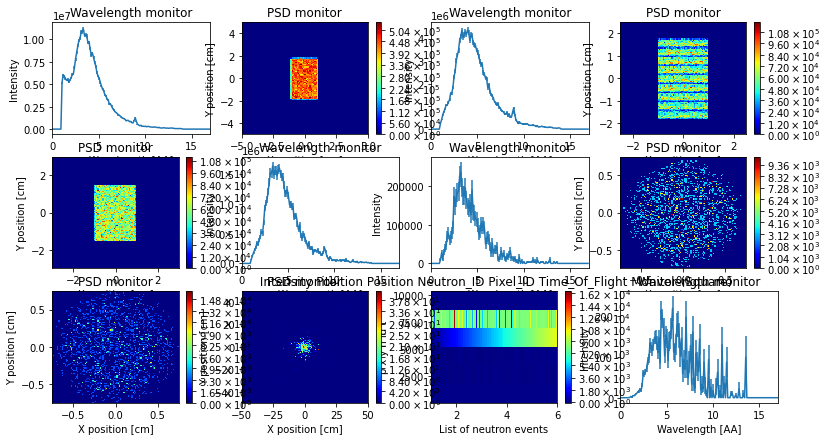

In [28]:
plot = plotter.make_sub_plot(data)

## McStas IDF for Mantid

In [29]:
import subprocess

In [30]:
cmd_idf = "mcdisplay.pl ISIS_SANS2d_Mantid_generated.instr --format=Mantid -n0 model_nr=5"

In [31]:
subprocess.call([cmd_idf], shell=True)

0

## Run McStas with NeXus - CLI

In [32]:
cmd_nexus = "mcstas ISIS_SANS2d_Mantid_generated.instr --trace; gcc -o ISIS_SANS2d_Mantid_generated.out ISIS_SANS2d_Mantid_generated.c -lm -DUSE_NEXUS -lNeXus -I/usr/include/nexus; ./ISIS_SANS2d_Mantid_generated.out --format=NeXus -d 1E6 --ncount=1E6 model_nr=5" 

In [33]:
subprocess.call([cmd_nexus], shell=True)

0

In [34]:
data_nexus = '1E6/mccode.h5'

## Run McStas with NeXus 

In [ ]:
data_nexus = ISIS_SANS2d_Mantid.run_full_instrument(foldername="data_1E7_nexus_nr15", parameters={"model_nr":15}, ncount=1E7, custom_flags=" -c --format=NeXus ")

In [ ]:
print(data_nexus)

# Mantid

## Setup Mantid

In [35]:
from mantid.simpleapi import *

## Load event data

In [36]:
# Load McStas event data from section 1
ws = Load(data_nexus)

## Rebin TOF

In [37]:
sample = Rebin(ws[0],'1000', False)

## Convert to lambda

In [38]:
sample = ConvertUnits(sample, 'Wavelength')

## Rebin lamba

In [39]:
binning = '1.75,0.1,16.5'
sample = Rebin(sample, binning)

## Load McStas normalization spectrum

In [40]:
mcstasMonitor = CloneWorkspace(mtd['Edet0.dat_ws'])

## Convert McStas data to Mantid histogram

In [41]:
mcstasMonitor = ConvertToHistogram(mcstasMonitor)
mcstasMonitor = rebin(mcstasMonitor, binning)
monitor     = CreateWorkspace(mcstasMonitor.dataX(0), mcstasMonitor.dataY(0), mcstasMonitor.dataE(0), UnitX='Wavelength')

##  Setup q grid

In [42]:
binningMASK	= '0.0035,0.001,0.4'

## Reduce to I(q) and normailzed

In [43]:
reduced_norm = Q1D(sample, binningMASK, WavelengthAdj='monitor')

## Save file

In [44]:
SaveAscii(InputWorkspace='reduced_norm', Filename='Mantid_reduced.dat', Separator='Tab', ScientificFormat=True)

## Plot I(q)

In [45]:
#%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

In [46]:
# Remove zero and inf
data_q = np.column_stack((reduced_norm.readX(0)[:-1], reduced_norm.readY(0)))
data_q = data_q[np.logical_not(np.isnan(data_q[:, 1]))]
data_q = data_q[np.logical_not(np.isinf(data_q[:, 1]))]
data_q = data_q[data_q[:, 1] != 0]

Text(0, 0.5, 'I(q) [a.u.]')

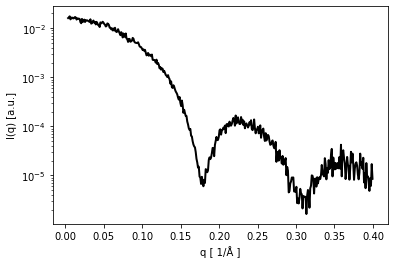

In [47]:
plt.plot(data_q[:,0], data_q[:,1], 'k-', lw=2)
plt.yscale('log')
plt.xlabel('q [ 1/Å ]')
plt.ylabel('I(q) [a.u.]')

In [48]:
# Save data for SasView
np.savetxt("Iq_cleaned.dat", data_q, header="<X>   <Y>", comments='')

In [49]:
# Save data for SasView with errors
data_q_err = np.column_stack((data_q[:,0], data_q[:,1], 0.2*data_q[:,1]))
np.savetxt("Iq_cleaned_err.dat", data_q_err, header="<X>   <Y>   <dY>", comments='')

In [50]:
Iq_file = "Iq_cleaned_err.dat"

# SasView

## Setup Sasmodles and SasView

In [51]:
from sasmodels.core import load_model
from sasmodels.bumps_model import Model, Experiment
from sasmodels.data import load_data

from bumps.names import *
from bumps.fitters import fit
from bumps.formatnum import format_uncertainty
from bumps.formatnum import *
from bumps.dream.stats import var_stats, format_vars

## Setup fit function

### Without polydispersion

In [52]:
def fit_data(filename, fit_method, bumps_samples, bumps_burn):
    """
    Run SasView SasModels fit
    :return:
    """

    # Load data to fit
    test_data = load_data(filename)

    # Set up fit model
    kernel = load_model('sphere')

    pars = dict(radius=150,
                background=0.0,
                scale=1E-6,
                sld=7.0,
                sld_solvent=1.0)
    model = Model(kernel, **pars)

    # SET THE FITTING PARAMETERS
    model.radius.range(10, 200)
    model.scale.range(1E-7, 1E0)
    model.background.range(0, 1000)

    M = Experiment(data=test_data, model=model)
    problem = FitProblem(M)
    print("Initial chisq", problem.chisq_str())

    result = fit(problem, method=fit_method, samples=bumps_samples, burn=bumps_burn)

    draw = result.state.draw(portion=1.0)
    all_vstats = var_stats(draw)

    return all_vstats




### With polydispersion

In [53]:
def fit_data_pd(filename, fit_method, bumps_samples, bumps_burn):
    """
    Run SasView SasModels fit
    :return:
    """

    # Load data to fit
    test_data = load_data(filename)

    # Set up fit model
    kernel = load_model('sphere')

    pars = dict(radius=150,
                background=0.0,
                scale=1E-6,
                sld=7.0,
                sld_solvent=1.0,
                radius_pd=0.03,
                radius_pd_n=35,
                radius_pd_nsigma=3)
    model = Model(kernel, **pars)

    # SET THE FITTING PARAMETERS
    model.radius.range(10, 200)
    model.scale.range(1E-7, 1E1)
    model.background.range(0, 100)
    model.radius_pd.range(0.0, 0.1)

    M = Experiment(data=test_data, model=model)
    problem = FitProblem(M)
    print("Initial chisq", problem.chisq_str())

    result = fit(problem, method=fit_method, samples=bumps_samples, burn=bumps_burn)

    draw = result.state.draw(portion=1.0)
    all_vstats = var_stats(draw)

    return all_vstats



## Setup print all results function

In [54]:
def print_all_results(bumps_fit_result):
    """
    Print parameters for fit
    :param bumps_fit_result:
    :return:
    """
    for v in bumps_fit_result:
        print(v.label, v.mean, v.median, v.best, v.p68[0], v.p68[1], v.p95[0], v.p95[1])
        
    

## Setup print parameter result function

In [55]:
def print_results(bumps_fit_result, parmeter_to_print, conf_interval):
    """
    SasModels "true" parmeter can be [v.mean, v.median, v.best]
    :param bumps_fit_result:
    :param parmeter_to_print:
    :param conf_interval:
    :return:
    """

    for v in bumps_fit_result:
        if v.label == parmeter_to_print:
            if conf_interval:
                print(parmeter_to_print + ': ' + str(v.best) + ',' + str(0.5*(v.p95[1]-v.p95[0])) + '\n')
            else:
                print(parmeter_to_print + ': ' + v.best + ',' + 0.5*(v.p68[1]-v.p68[0]) + '\n')
     

    

## Fit data

In [56]:
# Fit data from just made McStas-Mantid workflow. With polydisersion.
fit_result = fit_data('Iq_cleaned_err.dat', 'dream', 10000, 100)

SasView cannot load Iq_cleaned_err.dat.
Invalid XML syntax
NXcanSAS Reader could not load file Iq_cleaned_err.dat.dat


Initial chisq 24.9561(90)
# steps: 334, # draws: 10020


In [57]:
# Fit data from just made McStas-Mantid workflow. With polydisersion.
fit_result_pd = fit_data_pd('Iq_cleaned_err.dat', 'dream', 10000, 100)

Invalid XML syntax


Initial chisq 25.039(12)
# steps: 250, # draws: 10000


## Print results

In [58]:
print_results(fit_result, 'radius', True)
print_results(fit_result, 'scale', True)
print_results(fit_result, 'background', True)

radius: 25.189527249522843,17.56111239573818

scale: 5.8330744979889944e-05,3.150703473668461e-05

background: 1.8103615749571972e-06,2.4257510823484612e-06



In [59]:
print_results(fit_result_pd, 'radius', True)
print_results(fit_result_pd, 'scale', True)
print_results(fit_result_pd, 'background', True)
print_results(fit_result_pd, 'radius_pd', True)

radius: 25.13846558078455,58.82281826765853

scale: 6.040581064348343e-05,3.2915178508641055e-05

background: 5.1159956262381414e-08,2.9122713906151325e-06

radius_pd: 0.03485419161075497,0.04748396294880013



## Plot data and model - Without polydispersion

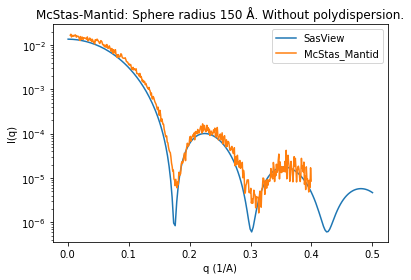

In [60]:
# Plot McStas-Mantid data and SasView model. Without polydispersion.
from numpy import logspace, linspace
from matplotlib import pyplot as plt
from sasmodels.core import load_model
from sasmodels.direct_model import call_kernel

# Load data
q2, Iq2, Iqerr2 = np.loadtxt('Iq_cleaned_err.dat', unpack=True, skiprows=2)

model = load_model('sphere')
q =linspace(0.001, 0.5, num=200)

kernel = model.make_kernel([q])
Iq = call_kernel(kernel, dict(radius=25.62, scale=5.33e-05, background=6.09e-07, sld=7.0, sld_solvent=1.0))
plt.semilogy(q, Iq, label='SasView')
plt.semilogy(q2, Iq2, label='McStas_Mantid')
plt.xlabel('q (1/A)')
plt.ylabel('I(q)')
plt.title('McStas-Mantid: Sphere radius 150 Å. Without polydispersion.')
plt.legend(loc='upper right')
plt.show()

## Plot data and model - With polydispersion

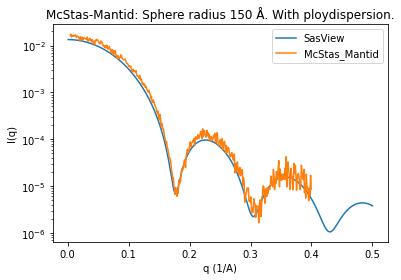

In [61]:
# Plot McStas-Mantid data and SasView model. With polydispersion to mimic instrument resolution effects.
# Still same mono-disperse McStas scattering kernel.
from numpy import logspace, linspace
from matplotlib import pyplot as plt
from sasmodels.core import load_model
from sasmodels.direct_model import call_kernel

# Load data
q2, Iq2, Iqerr2 = np.loadtxt('Iq_cleaned_err.dat', unpack=True, skiprows=2)

model = load_model('sphere')
q =linspace(0.001, 0.5, num=200)

kernel = model.make_kernel([q])
Iq = call_kernel(kernel, dict(radius=25.33, radius_pd=0.035,radius_pd_n=35 , scale=5.41e-05, background=9.32e-10, sld=7.0, sld_solvent=1.0))
plt.semilogy(q, Iq, label='SasView')
plt.semilogy(q2, Iq2, label='McStas_Mantid')
plt.xlabel('q (1/A)')
plt.ylabel('I(q)')
plt.title('McStas-Mantid: Sphere radius 150 Å. With ploydispersion.')
plt.legend(loc='upper right')
plt.show()

# Convert to py

In [63]:
jupytext --to py SANS2D.ipynb

[jupytext] Reading SANS2D.ipynb
[jupytext] Writing SANS2D.py (destination file replaced)
